## Ads CTR Forecasting

> Ads CTR Analysis stands for Click-Through Rate Analysis for advertisements. Ads CTR Analysis is the process of examining the effectiveness of online 
advertisements by measuring the rate at which users click on an ad’s link to reach the advertiser’s website

> Ads CTR Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose


In [7]:
ctr = pd.read_csv('ctr.csv')


In [8]:
ctr

,Date,Clicks,Impressions
0,2022-10-19,2851,58598
1,2022-10-20,2707,57628
2,2022-10-21,2246,50135
3,2022-10-22,1686,40608
4,2022-10-23,1808,41999
...,...,...,...
360,2023-10-14,885,28487
361,2023-10-15,1180,33440
362,2023-10-16,1624,41688
363,2023-10-17,1751,40957


In [9]:
ctr.columns

Index(['Date', 'Clicks', 'Impressions'], dtype='object')

In [10]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         365 non-null    object
 1   Clicks       365 non-null    int64 
 2   Impressions  365 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ KB


In [11]:
ctr.describe()

,Clicks,Impressions
count,365.000000,365.000000
mean,2070.372603,49612.717808
std,652.136850,9894.719622
min,816.000000,26489.000000
25%,1604.000000,41999.000000
50%,1948.000000,48428.000000
75%,2553.000000,57326.000000
max,3720.000000,72052.000000


In [12]:
ctr['Date'] = pd.to_datetime(ctr['Date'],format='%Y/%m/%d')


In [14]:
ctr.set_index('Date',inplace=True)

In [15]:
ctr

,Clicks,Impressions
Date,,
2022-10-19,2851,58598
2022-10-20,2707,57628
2022-10-21,2246,50135
2022-10-22,1686,40608
2022-10-23,1808,41999
...,...,...
2023-10-14,885,28487
2023-10-15,1180,33440
2023-10-16,1624,41688


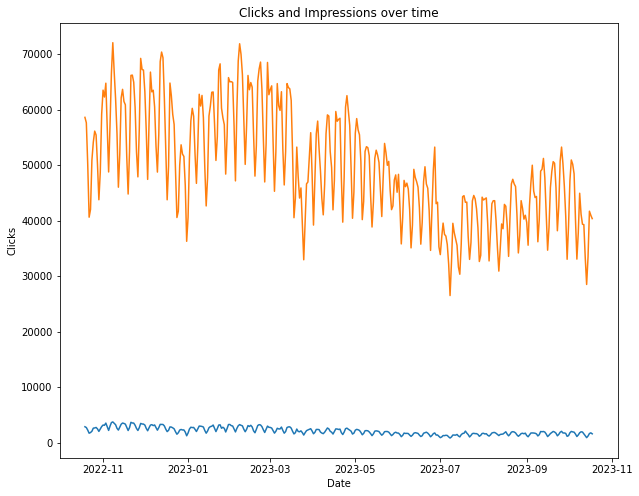

In [24]:
plt.figure(figsize=(10,8))
sns.lineplot(x=ctr.index,y=ctr['Clicks'])
sns.lineplot(x=ctr.index,y=ctr['Impressions'])

plt.title('Clicks and Impressions over time')
plt.show()


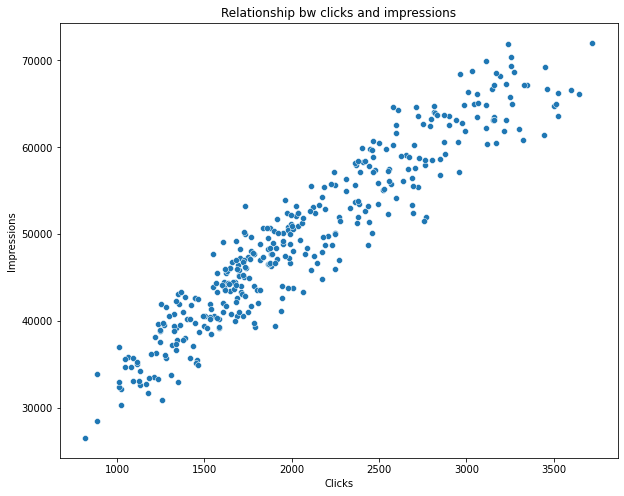

In [28]:
plt.figure(figsize=(10,8))


sns.scatterplot(x='Clicks',y='Impressions',data=ctr)

plt.title('Relationship bw clicks and impressions')
plt.show()

In [30]:
ctr['CTR'] = (ctr['Clicks']/ctr['Impressions']) * 100



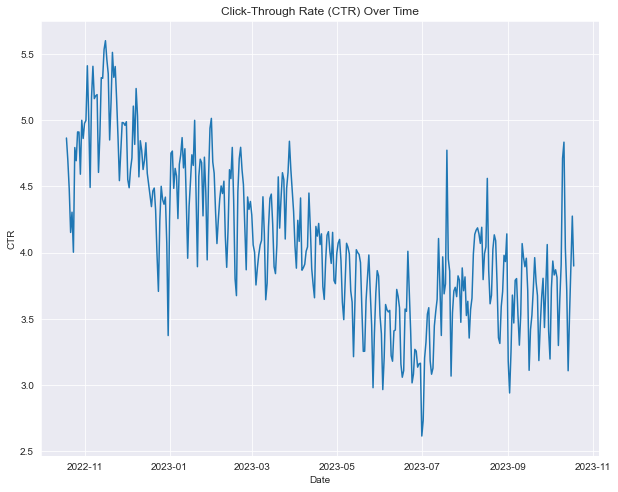

In [36]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

sns.lineplot(x=ctr.index,y='CTR',data=ctr)
plt.title('Click-Through Rate (CTR) Over Time')
plt.show()